In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('uber.csv')

In [2]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


key: Unique trip identifier.
fare_amount: Cost of trip (in USD).
pickup_datetime: Timestamp of trip start.
passenger_count: Number of passengers.
pickup_longitude & pickup_latitude: Initial pickup coordinates.
dropoff_longitude & dropoff_latitude: Drop-off coordinates.

In [3]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df = df.dropna()

<Axes: >

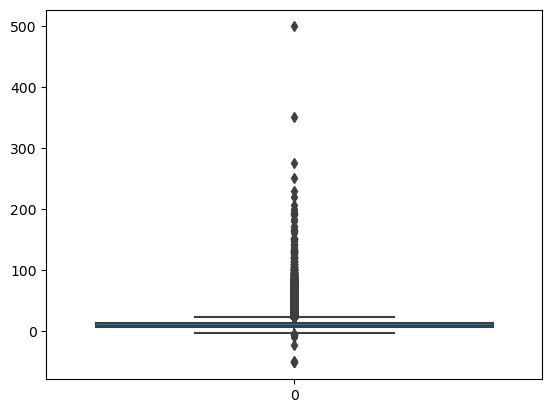

In [8]:
sns.boxplot(data=df['fare_amount'])

In [9]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < upper_limit)]

<Axes: >

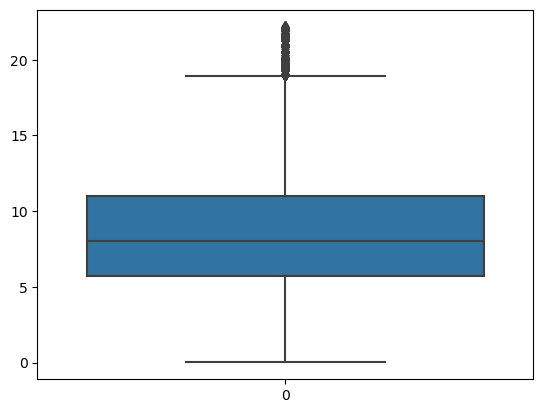

In [10]:
sns.boxplot(data=df['fare_amount'])

In [36]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,day_of_week,hour
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683464,3,19
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457722,4,20
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.891616,0,21
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.837112,4,8
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,5.654758,3,17


In [12]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Raio da terra em Km
    dlat = np.radians(lat2 - lat1) # Diferença de latitudes dos pontos em radianos
    dlon = np.radians(lon2 - lon1) # Diferença de longitudes dos pontos em radianos
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c # Distância em Km
    return distance

df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

C:\Users\jpnet\AppData\Local\Temp\ipykernel_15504\2782912261.py:8: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))


<Axes: xlabel='distance_km', ylabel='fare_amount'>

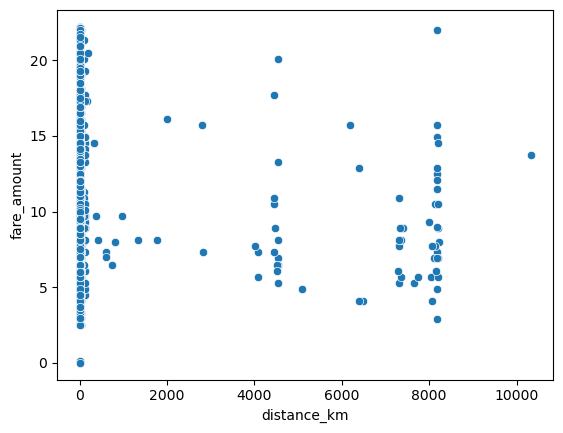

In [13]:
sns.scatterplot(x=df['distance_km'], y=df['fare_amount'])

In [14]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

df = df[(df['fare_amount'] > lower_limit) & (df['fare_amount'] < upper_limit)]

distance_limit = 100
df = df[df['distance_km'] <= distance_limit]


<Axes: xlabel='distance_km', ylabel='fare_amount'>

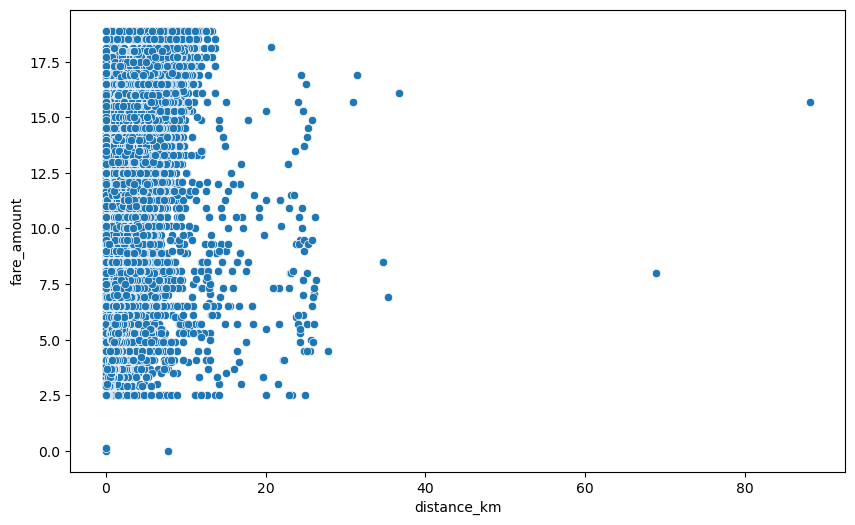

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['distance_km'], y=df['fare_amount'])

<Axes: >

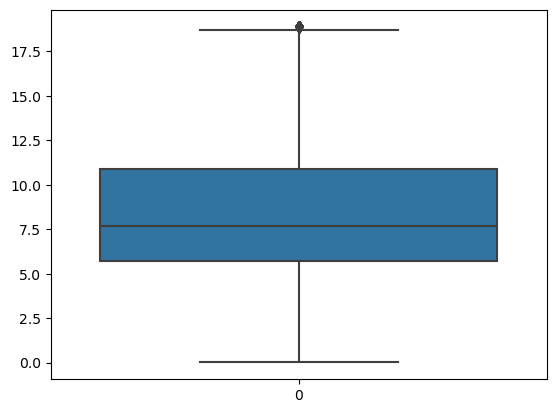

In [16]:
sns.boxplot(data=df['fare_amount'])

In [17]:
correlation = df['fare_amount'].corr(df['distance_km'])
correlation

0.7421644156866397

In [18]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

stats_by_day = df.groupby('day_of_week')['fare_amount'].describe()
stats_by_day

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
0,22196.0,8.354578,3.556533,0.01,5.7,7.7,10.5,18.9
1,25036.0,8.497122,3.589758,2.50,5.7,7.7,10.5,18.9
2,25717.0,8.608608,3.650355,2.50,5.7,7.7,10.9,18.9
3,26426.0,8.648570,3.683146,2.50,5.7,8.0,10.9,18.9
4,27326.0,8.657260,3.673866,2.50,5.7,8.0,10.9,18.9
5,26999.0,8.632528,3.663387,2.50,5.7,8.0,10.9,18.9
6,23017.0,8.551385,3.680611,0.01,5.7,7.7,10.9,18.9


In [19]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,day_of_week
count,1.767170e+05,176717.000000,176717.000000,176717.000000,176717.000000,176717.000000,176717.000000,176717.000000,176717.000000
mean,2.770048e+07,8.570607,-72.597835,39.969377,-72.596416,39.967659,1.681791,2.598967,3.045259
std,1.601024e+07,3.645976,10.124241,6.004163,10.124049,5.942471,1.394277,1.894382,1.943861
min,1.000000e+00,0.010000,-75.387785,-74.009697,-75.375315,-74.015750,0.000000,0.000000,0.000000
25%,1.380888e+07,5.700000,-73.992300,40.736167,-73.991658,40.736029,1.000000,1.297822,1.000000
50%,2.773331e+07,7.700000,-73.982244,40.752667,-73.980980,40.753402,1.000000,2.143264,3.000000
75%,4.153299e+07,10.900000,-73.969263,40.766500,-73.967355,40.767317,2.000000,3.443662,5.000000
max,5.542357e+07,18.900000,40.808425,401.066667,40.831932,45.031598,208.000000,88.129547,6.000000


In [20]:
df['fare_amount'].min()

0.01

In [21]:
df = df[df['fare_amount'] > 1]

In [22]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,day_of_week
count,1.767140e+05,176714.000000,176714.000000,176714.000000,176714.000000,176714.000000,176714.000000,176714.000000,176714.000000
mean,2.770026e+07,8.570752,-72.597811,39.969364,-72.596393,39.967645,1.681802,2.598967,3.045243
std,1.601024e+07,3.645837,10.124326,6.004213,10.124134,5.942521,1.394286,1.894338,1.943838
min,1.000000e+00,2.500000,-75.387785,-74.009697,-75.375315,-74.015750,0.000000,0.000000,0.000000
25%,1.380870e+07,5.700000,-73.992300,40.736167,-73.991658,40.736029,1.000000,1.297823,1.000000
50%,2.773322e+07,7.700000,-73.982243,40.752667,-73.980980,40.753402,1.000000,2.143269,3.000000
75%,4.153293e+07,10.900000,-73.969262,40.766500,-73.967355,40.767317,2.000000,3.443650,5.000000
max,5.542357e+07,18.900000,40.808425,401.066667,40.831932,45.031598,208.000000,88.129547,6.000000


<Axes: xlabel='distance_km', ylabel='fare_amount'>

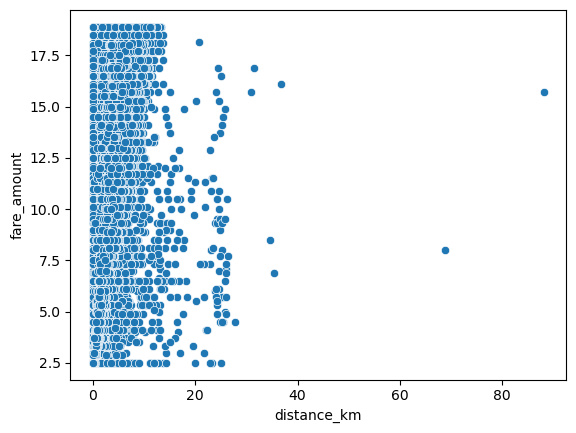

In [23]:
sns.scatterplot(x = df['distance_km'], y = df['fare_amount'])

In [24]:
fare_amount_below = df[df['fare_amount'] < 1].shape[0]
fare_amount_below

0

In [25]:
df['fare_amount'].min()

2.5

In [26]:
df = df[df['distance_km'] < 50]

<Axes: xlabel='distance_km', ylabel='fare_amount'>

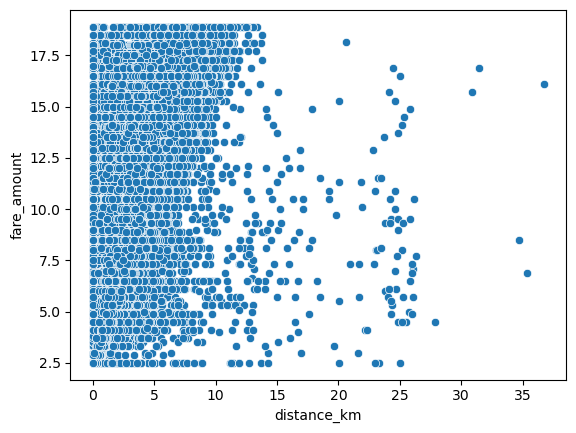

In [27]:
sns.scatterplot(x = df['distance_km'], y = df['fare_amount'])

In [64]:
from sklearn.model_selection import train_test_split

X = df[['distance_km','hour','day_of_week']]
y = df[['fare_amount']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

# Treinar o modelo
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

# Fazer previsões
y_pred_gb = gb_reg.predict(X_test)

# Avaliar o modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
print(f'Gradient Boosting RMSE: {rmse_gb}')

c:\Users\jpnet\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting RMSE: 2.0797326353569243


In [56]:
# Calcular o erro absoluto
errors = np.abs(y_test - y_pred_gb)

# Calcular o erro médio absoluto acumulado ao longo do tempo (ou por índice de previsão)
cumulative_mae = np.cumsum(errors) / np.arange(1, len(errors) + 1)

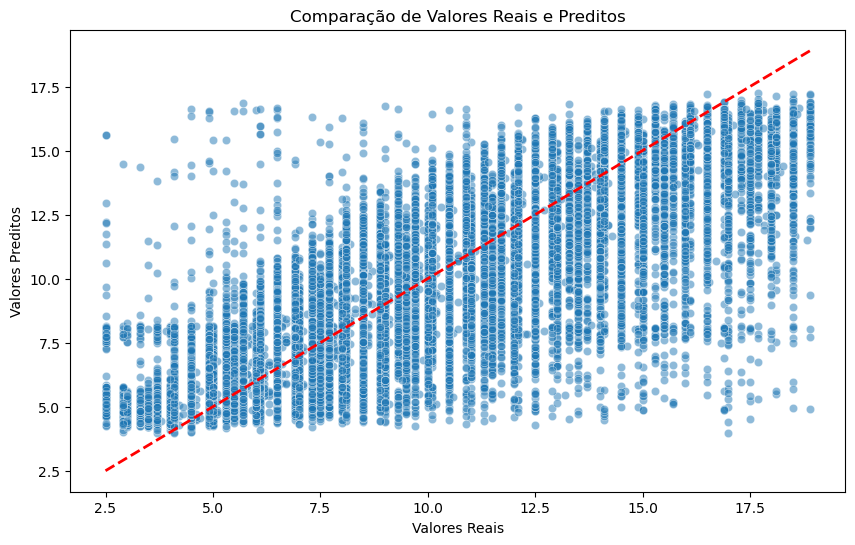

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Valores Reais e Preditos')
plt.show()


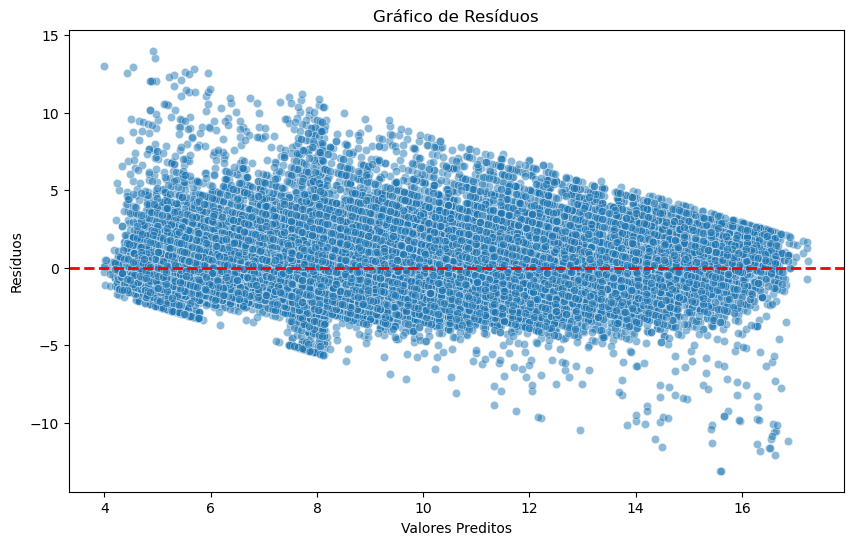

In [51]:
# Calcular resíduos
residuos = y_test - y_pred_gb

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_gb, y=residuos, alpha=0.5)
plt.axhline(0, linestyle='--', color='r', linewidth=2)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()


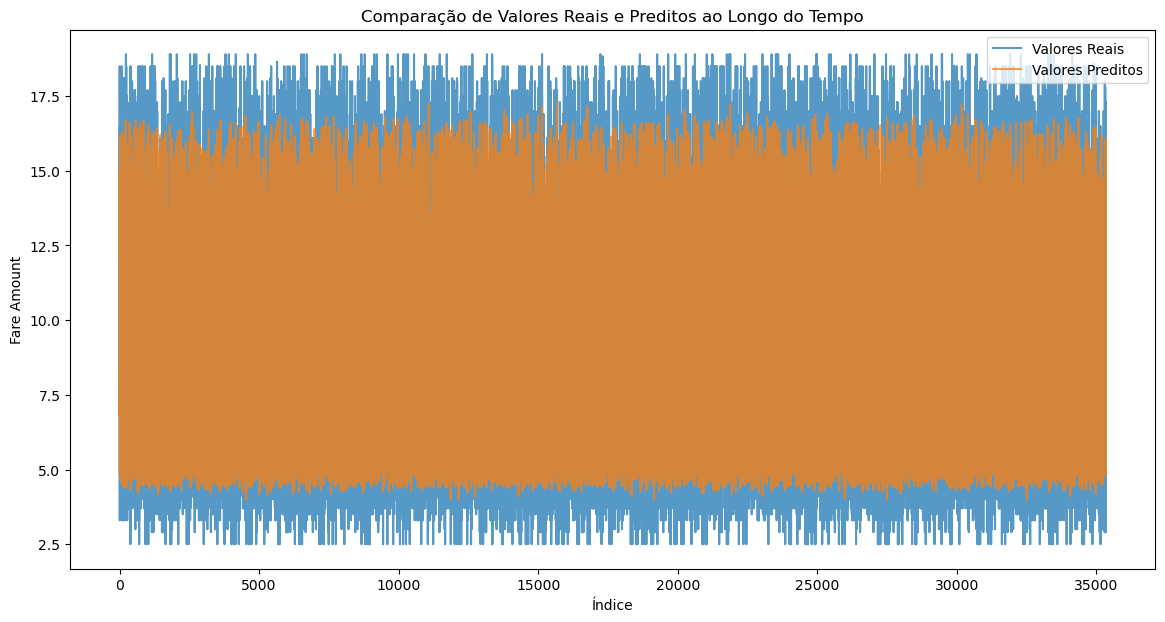

In [52]:
# Comparação de previsões e valores reais
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Valores Reais', alpha=0.75)
plt.plot(y_pred_gb, label='Valores Preditos', alpha=0.75)
plt.xlabel('Índice')
plt.ylabel('Fare Amount')
plt.title('Comparação de Valores Reais e Preditos ao Longo do Tempo')
plt.legend()
plt.show()


In [58]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,day_of_week,hour
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683464,3,19
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457722,4,20
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.891616,0,21
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.837112,4,8
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,5.654758,3,17


In [61]:
correlation = df['fare_amount'].corr(df['hour'])
correlation

-0.004033086369694737